# Aboute the dataset 
## Description
### Context
Since 2008, guests and hosts have used Airbnb to travel in a more unique, personalized way. As part of the Airbnb Inside initiative, this dataset describes the listing activity of homestays in Boston, MA.

### Content
The following Airbnb activity is included in this Boston dataset: * Listings, including full descriptions and average review score * Reviews, including unique id for each reviewer and detailed comments * Calendar, including listing id and the price and availability for that day

### Acknowledgement
This dataset is part of Airbnb Inside, and the original source can be found [here](http://insideairbnb.com/get-the-data.html).

In [1]:
# Importing necessary libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import re # regular expression package 
import matplotlib.pyplot as plt
import matplotlib
import matplotlib.ticker as ticker
from mpl_toolkits.basemap import Basemap
import matplotlib as mpl

## Reading Bosten AirBnb data files

In [2]:
# Listings, including full descriptions and average review score.
listings = pd.read_csv('./data/listings.csv')
# Rename id into listing_id to merge this dataframe with calendar dataframe later on
listings.rename(columns={'id':'listing_id'}, inplace=True)
listings.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,12147973,https://www.airbnb.com/rooms/12147973,20160906204935,2016-09-07,Sunny Bungalow in the City,"Cozy, sunny, family home. Master bedroom high...",The house has an open and cozy feel at the sam...,"Cozy, sunny, family home. Master bedroom high...",none,"Roslindale is quiet, convenient and friendly. ...",...,NaN,f,NaN,NaN,f,moderate,f,f,1,NaN
1,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,9.0,f,NaN,NaN,t,moderate,f,f,1,1.30
2,6976,https://www.airbnb.com/rooms/6976,20160906204935,2016-09-07,Mexican Folk Art Haven in Boston,"Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...","Come stay with a friendly, middle-aged guy in ...",none,The LOCATION: Roslindale is a safe and diverse...,...,10.0,f,NaN,NaN,f,moderate,t,f,1,0.47
3,1436513,https://www.airbnb.com/rooms/1436513,20160906204935,2016-09-07,Spacious Sunny Bedroom Suite in Historic Home,Come experience the comforts of home away from...,Most places you find in Boston are small howev...,Come experience the comforts of home away from...,none,Roslindale is a lovely little neighborhood loc...,...,10.0,f,NaN,NaN,f,moderate,f,f,1,1.00
4,7651065,https://www.airbnb.com/rooms/7651065,20160906204935,2016-09-07,Come Home to Boston,"My comfy, clean and relaxing home is one block...","Clean, attractive, private room, one block fro...","My comfy, clean and relaxing home is one block...",none,"I love the proximity to downtown, the neighbor...",...,10.0,f,NaN,NaN,f,flexible,f,f,1,2.25


In [3]:
calendar = pd.read_csv('./data/calendar.csv')
calendar.head()

,listing_id,date,available,price
0,12147973,2017-09-05,f,NaN
1,12147973,2017-09-04,f,NaN
2,12147973,2017-09-03,f,NaN
3,12147973,2017-09-02,f,NaN
4,12147973,2017-09-01,f,NaN


# Analysis Questions 
### When is the peak of bosten airbnb prices?

### Whis area in bosten has the highest prices?

### Does being a superhost helps you rent more than non superhosts?

## When is the peak of bosten airbnb prices?

Lets start by changing the "date" column into datetime object and then extrct the year and month from that column. 

In [4]:
# Data Preprossing and feature engineering 
calendar['date'] = pd.to_datetime(calendar['date'])
calendar['year'], calendar['month'] = calendar['date'].apply(lambda x: x.year), calendar['date'].apply(lambda x: x.month)
calendar.head()

,listing_id,date,available,price,year,month
0,12147973,2017-09-05,f,NaN,2017,9
1,12147973,2017-09-04,f,NaN,2017,9
2,12147973,2017-09-03,f,NaN,2017,9
3,12147973,2017-09-02,f,NaN,2017,9
4,12147973,2017-09-01,f,NaN,2017,9


In [5]:
data = pd.merge(listings, calendar, on='listing_id', how='inner', suffixes=('_listings', '_calendar'))
print(data.columns)

Index(['listing_id', 'listing_url', 'scrape_id', 'last_scraped', 'name',
       'summary', 'space', 'description', 'experiences_offered',
       'neighborhood_overview', 'notes', 'transit', 'access', 'interaction',
       'house_rules', 'thumbnail_url', 'medium_url', 'picture_url',
       'xl_picture_url', 'host_id', 'host_url', 'host_name', 'host_since',
       'host_location', 'host_about', 'host_response_time',
       'host_response_rate', 'host_acceptance_rate', 'host_is_superhost',
       'host_thumbnail_url', 'host_picture_url', 'host_neighbourhood',
       'host_listings_count', 'host_total_listings_count',
       'host_verifications', 'host_has_profile_pic', 'host_identity_verified',
       'street', 'neighbourhood', 'neighbourhood_cleansed',
       'neighbourhood_group_cleansed', 'city', 'state', 'zipcode', 'market',
       'smart_location', 'country_code', 'country', 'latitude', 'longitude',
       'is_location_exact', 'property_type', 'room_type', 'accommodates',
       'bat

In [10]:
data = data[data.available=='t']

In [12]:
data.fillna(0, inplace = True)

In [13]:
data = data[data.price_listings!= 0]
data.head()

,listing_id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month,date,available,price_calendar,year,month
365,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,moderate,f,f,1,1.3,2017-08-22,t,$65.00,2017,8
366,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,moderate,f,f,1,1.3,2017-08-21,t,$65.00,2017,8
367,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,moderate,f,f,1,1.3,2017-08-20,t,$65.00,2017,8
368,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,moderate,f,f,1,1.3,2017-08-19,t,$75.00,2017,8
369,3075044,https://www.airbnb.com/rooms/3075044,20160906204935,2016-09-07,Charming room in pet friendly apt,Charming and quiet room in a second floor 1910...,Small but cozy and quite room with a full size...,Charming and quiet room in a second floor 1910...,none,"The room is in Roslindale, a diverse and prima...",...,moderate,f,f,1,1.3,2017-08-18,t,$75.00,2017,8


In [14]:
# Extracting prices and converting them from the dataframe 
price = data.price_listings
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
int_prices = [int(i) for i in prices]
data.price_listings = int_prices

In [ ]:
# Extracting prices and converting them from the dataframe 
price = listing['p']
prices=[]

for p in price:
    p = re.sub('[^0-9.]+','', p)
    prices.append(float(p))
int_prices = [int(i) for i in prices]
data.price_calendar = int_prices

In [ ]:
data.price_calendar.head(2000)

## Plotting Prices by Date 

395366


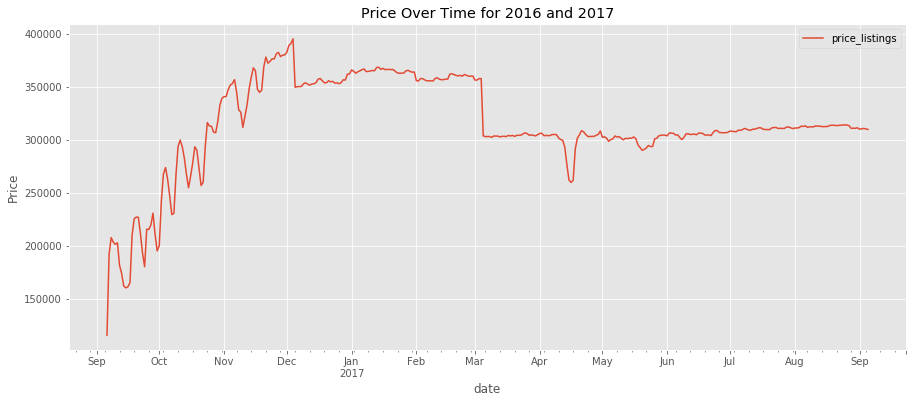

In [15]:
# Set the plot style 
plt.style.use('ggplot')
# Setting the year as major tick and the month as a minor tick in x-axis
plt.gca().xaxis.set_major_locator(ticker.AutoLocator())
plt.gca().xaxis.set_minor_locator(ticker.AutoLocator())
# Plotting price by date 
data.groupby(data['date'])['price_listings'].sum().plot(figsize=(15, 6))
# Setting graph title, Y axis label and showing the legend
plt.title('Price Over Time for 2016 and 2017')
plt.ylabel('Price')
plt.legend()
print(max(data.groupby(data['date'])['price_listings'].sum()))

## Findings <br>
As shown in the graph above we can see that prices starts increasing from September 2016 and reaches its highest peak in late Novermber with a total of $428,100. 

## Which is the area with the highest prices in bosten?

In [29]:
data.latitude.head()

365    42.286241
366    42.286241
367    42.286241
368    42.286241
369    42.286241
Name: latitude, dtype: float64

C:\Users\qubay\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.


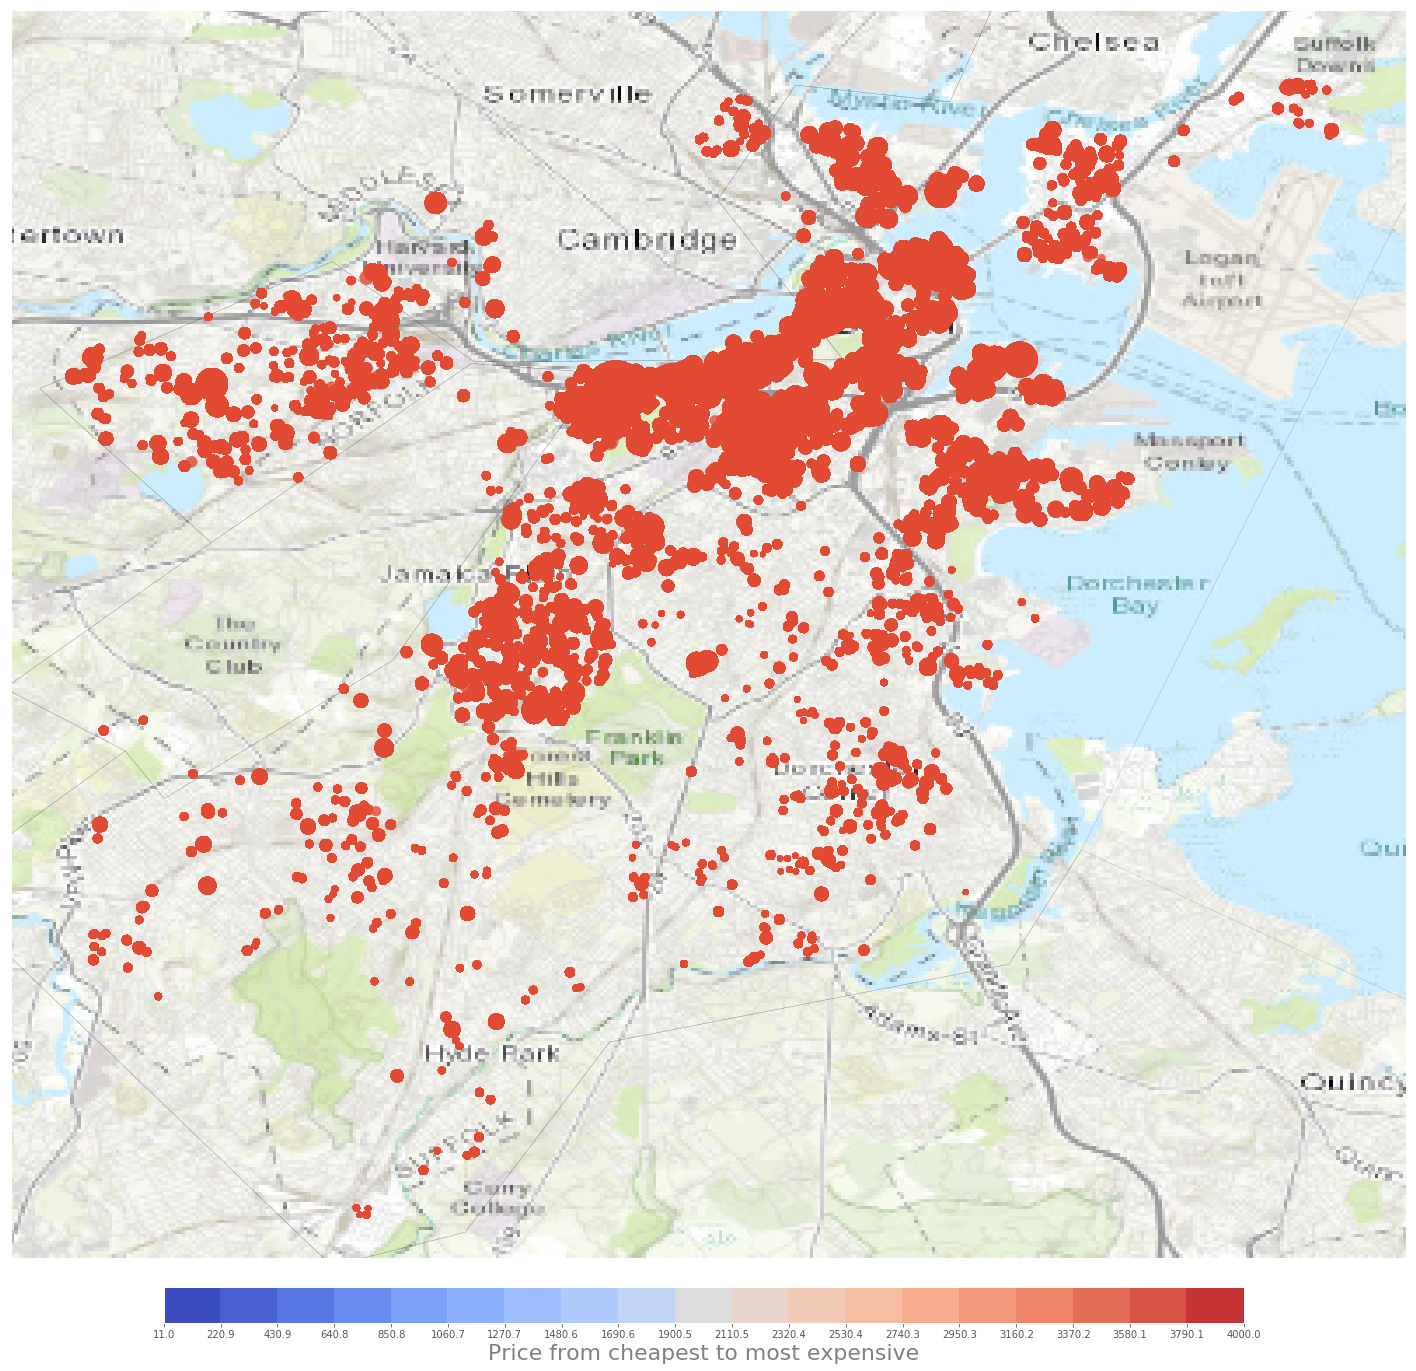

In [30]:
fig = plt.figure(figsize=(25,25))

m = Basemap(projection='merc', 
            llcrnrlat=42.23, 
            urcrnrlat=42.4, 
            llcrnrlon=-71.18, 
            urcrnrlon=-70.99,
            epsg=4269)

m.drawcounties()

num_colors = 20
values = data.price_listings
cm = plt.get_cmap('coolwarm')

scheme = [cm(i / num_colors) for i in range(num_colors)]
bins = np.linspace(float(values.min()), float(values.max()), float(num_colors))

data['bin'] = np.digitize(values, bins) - 1

cmap = mpl.colors.ListedColormap(scheme)

# color = [scheme[data[(data.latitude==x)&(data.longitude==y)]['bin'].values] 
#              for x,y in zip(data.latitude, data.longitude)]

x,y = m(data.longitude.values, data.latitude.values)

scat = m.scatter(x, y, 
                 s = data.price_listings, 
#                  color = color, 
                 cmap=cmap, 
                 alpha=0.8)

m.arcgisimage(service='World_Topo_Map')

# Draw color legend.
                        #[left, top, width, height]
ax_legend = fig.add_axes([0.21, 0.12, 0.6, 0.02])

cb = mpl.colorbar.ColorbarBase(ax_legend, 
                               cmap=cmap, 
                               ticks=bins, 
                               boundaries=bins, 
                               orientation='horizontal')

cb.ax.set_xticklabels([str(round(i, 1)) for i in bins])

cb.set_label("Price from cheapest to most expensive",
            fontsize=22,
            alpha = 0.75)


plt.show()


## Findings

## Does being a superhost helps you rent more than non superhosts?

## Findings